In [1]:
import pandas as pd
import numpy as np
import requests

In [2]:
data=pd.read_csv('cleaned_data.csv')
data

,Unnamed: 0,id,created_at,updated_at,name,description,status,gsf_standards_version,estimated_annual_credits,crediting_period_start_date,...,Goal 1: No Poverty,Goal 13: Climate Action,Goal 7: Affordable and Clean Energy,Goal 5: Gender Equality,Goal 6: Clean Water and Sanitation,Goal 15: Life On Land,Goal 12: Responsible Production and Consumption,VER_issued_credits,VER_retired_credits,CER_issued_credits
0,0,2747,2020-06-24 07:17:28+00:00,2022-08-03 13:18:49+00:00,GS10789 VPA1: Efficient and Clean Cooking for ...,The VPA deploys highly efficient improved cook...,GOLD_STANDARD_CERTIFIED_PROJECT,Gold Standard for the Global Goals,339191,2019-10-02,...,True,True,True,False,False,False,False,1062310.0,44394.0,0.0
1,1,2756,2020-07-03 13:18:29+00:00,2022-07-06 15:42:08+00:00,GS1247 VPA 259 Improved Kitchen Regimes Multi-...,"This Micro-Scale Voluntary Project Activity, i...",GOLD_STANDARD_CERTIFIED_PROJECT,Gold Standard for the Global Goals,10000,2019-08-23,...,False,True,False,True,True,False,False,7593.0,1139.0,0.0
2,2,2757,2020-07-03 13:18:43+00:00,2022-07-06 15:42:36+00:00,GS1247 VPA 260 Improved Kitchen Regimes Multi-...,"This Micro-Scale Voluntary Project Activity, i...",GOLD_STANDARD_CERTIFIED_PROJECT,Gold Standard for the Global Goals,10000,2019-08-23,...,False,True,False,True,True,False,False,7701.0,4405.0,0.0
3,3,2758,2020-07-03 13:18:51+00:00,2022-07-06 15:42:43+00:00,GS1247 VPA 261 Improved Kitchen Regimes Multi-...,"This Micro-Scale Voluntary Project Activity, i...",GOLD_STANDARD_CERTIFIED_PROJECT,Gold Standard for the Global Goals,10000,2019-08-23,...,False,True,False,True,True,False,False,7376.0,1374.0,0.0
4,4,2759,2020-07-03 13:18:56+00:00,2022-07-06 15:42:48+00:00,GS1247 VPA 262 Improved Kitchen Regimes Multi-...,"This Micro-Scale Voluntary Project Activity, i...",GOLD_STANDARD_CERTIFIED_PROJECT,Gold Standard for the Global Goals,10000,2019-08-23,...,False,True,False,True,True,False,False,7024.0,4372.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,145,3500,2022-03-15 16:29:14+00:00,2022-11-18 07:43:55+00:00,Bundling of household biogas plants for therma...,Project activity includes bundling of househol...,GOLD_STANDARD_CERTIFIED_PROJECT,Gold Standard for the Global Goals,36000,2021-03-01,...,False,True,True,False,False,False,False,35133.0,0.0,0.0
146,146,3506,2022-04-15 01:18:34+00:00,2023-02-15 09:16:46+00:00,CNOOC Pingyin Wind Farm Phase I project,"The project is located in Pingyin County, Jina...",GOLD_STANDARD_CERTIFIED_PROJECT,Gold Standard for the Global Goals,83913,2021-09-01,...,False,True,True,False,False,False,False,123330.0,0.0,0.0
147,147,3507,2022-04-15 01:22:01+00:00,2022-12-26 10:55:19+00:00,CNOOC Weifang Binhai Wind Farm Phase II Project,"The project is located in Weifang City, Shando...",GOLD_STANDARD_CERTIFIED_PROJECT,Gold Standard for the Global Goals,81358,2021-07-01,...,False,True,True,False,False,False,False,0.0,0.0,0.0
148,148,3508,2022-04-15 01:23:14+00:00,2023-01-24 17:34:27+00:00,Yunxiao Zengjiang Wind Farm,The project installs and runs 15 wind turbines...,GOLD_STANDARD_CERTIFIED_PROJECT,Gold Standard for the Global Goals,45365,2021-01-31,...,False,True,True,False,False,False,False,42682.0,0.0,0.0


In [3]:
data['VER_percentage_sold']=data['VER_retired_credits']/data['VER_issued_credits']

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 38 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Unnamed: 0                                       150 non-null    int64  
 1   id                                               150 non-null    int64  
 2   created_at                                       150 non-null    object 
 3   updated_at                                       150 non-null    object 
 4   name                                             150 non-null    object 
 5   description                                      150 non-null    object 
 6   status                                           150 non-null    object 
 7   gsf_standards_version                            150 non-null    object 
 8   estimated_annual_credits                         150 non-null    int64  
 9   crediting_period_start_date     

In [5]:
import matplotlib.pyplot as plt

In [6]:
data.columns[1]

'id'

Text(0.5, 1.0, 'VER Percentage Credits Sold')

<Figure size 576x288 with 0 Axes>

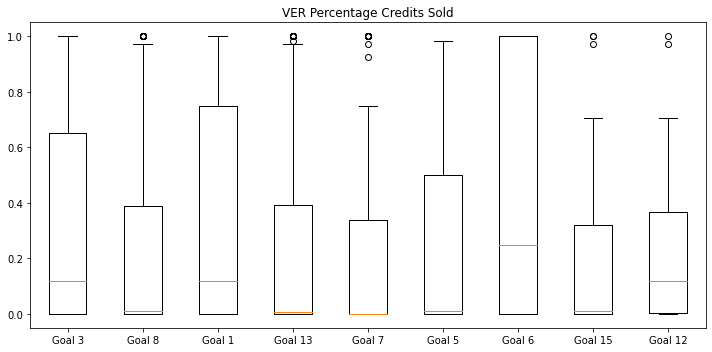

In [7]:
plt.figure(figsize=[8,4])
fig, ax = plt.subplots(figsize=(10,5),layout='tight')
goals_sales={}
for i in range(0,9):
    colname=data.columns[25+i]
    colname=colname.split(':',1)[0]
    goals_sales[colname]=list(data[data.iloc[:,25+i]==True]['VER_percentage_sold'].dropna())
ax.boxplot(goals_sales.values())
ax.set_xticklabels(goals_sales.keys())
plt.title('VER Percentage Credits Sold')

Text(0.5, 1.0, 'VER Number of Credits Sold')

<Figure size 576x288 with 0 Axes>

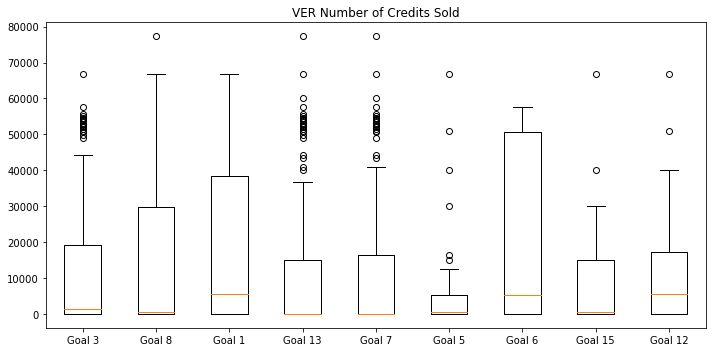

In [8]:
plt.figure(figsize=[8,4])
fig, ax = plt.subplots(figsize=(10,5),layout='tight')
goals_sales={}
for i in range(0,9):
    colname=data.columns[25+i]
    colname=colname.split(':',1)[0]
    goals_sales[colname]=list(data[data.iloc[:,25+i]==True]['VER_retired_credits'].dropna())
ax.boxplot(goals_sales.values())
ax.set_xticklabels(goals_sales.keys())
plt.title('VER Number of Credits Sold')

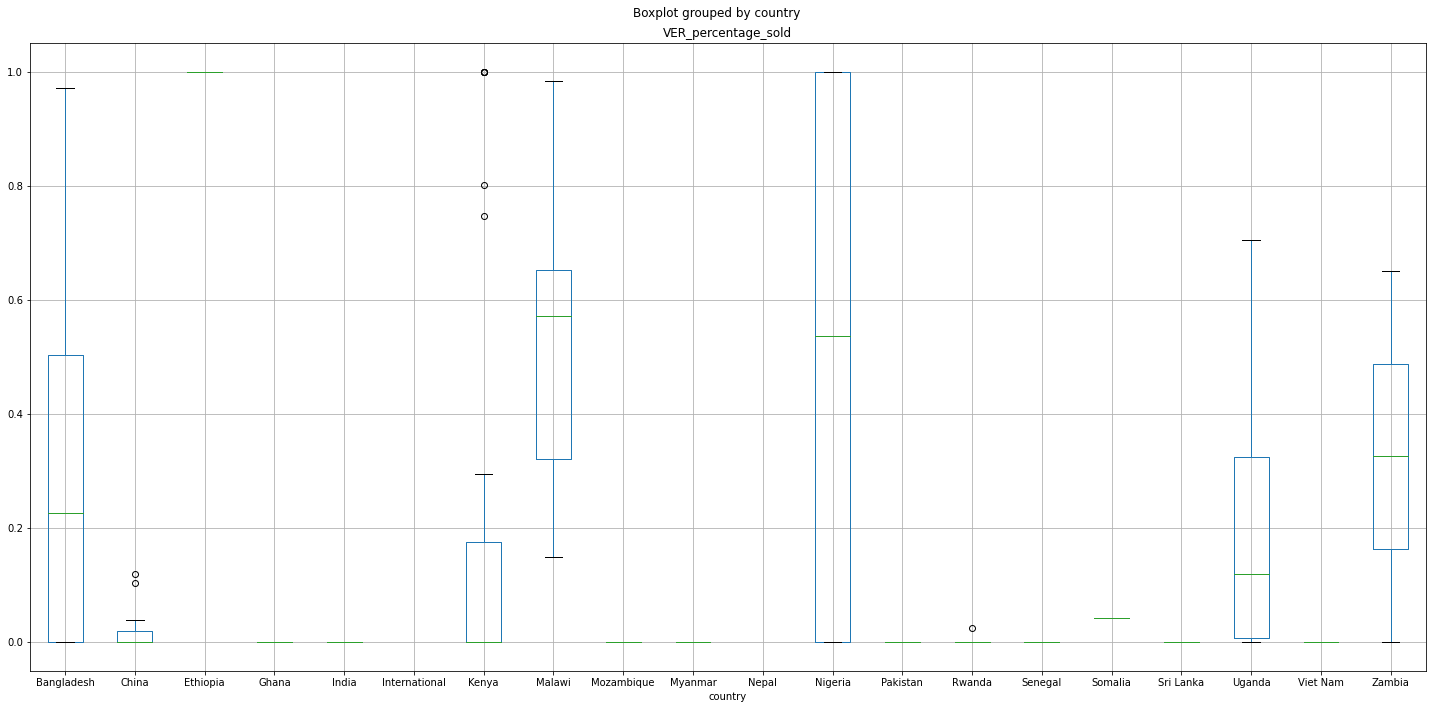

In [34]:
data.boxplot('VER_percentage_sold',by='country',figsize=(20,10))
plt.tight_layout()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 38 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Unnamed: 0                                       150 non-null    int64  
 1   id                                               150 non-null    int64  
 2   created_at                                       150 non-null    object 
 3   updated_at                                       150 non-null    object 
 4   name                                             150 non-null    object 
 5   description                                      150 non-null    object 
 6   status                                           150 non-null    object 
 7   gsf_standards_version                            150 non-null    object 
 8   estimated_annual_credits                         150 non-null    int64  
 9   crediting_period_start_date     

In [17]:
data['created_at'].min()

'2020-06-24 07:17:28+00:00'

In [19]:
data['type'].value_counts()

Energy Efficiency - Domestic    111
Biogas - Heat                    11
Biogas - Electricity             10
Other                             6
Wind                              6
Geothermal                        3
Solar Thermal - Electricity       2
Biogas - Cogeneration             1
Name: type, dtype: int64